<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
__CDF Term-1 Project Report on 1000 Movie Dataset__ 

__Susanta Kumar Labala__ 

__08/10/2018__


### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Data profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers](#section401)<br/>
    - 4.2 [Drop the unnecessary columns](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Handling NaN data in categorical variables](#section404)<br/>
    - 4.5 [Post profiling](#section405)<br/>     
- 5. [Questions](#section5)</br>
    - 5.1 [How Movies Popularity Over Years ?](#section501)<br/>
    - 5.2 [How the distribution of Votes in different revenue levels ?](#section502)<br/>
    - 5.3 [How the distribution of revenue in different score rating levels ?](#section503)<br/>
    - 5.4 [Explore Summary](#section504)<br/>    
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [ Find the Properties are Associated with Successful Movies :](#section601)<br/>
         - 6.1.1 [What's the Metascore level movie are associated with movies that have high popularity?](#section602)<br/>
         - 6.1.2 [What's the runtime level are associated with movies that have high popularity on average?](#section603)<br/>
         - 6.1.3 [Establish coorelation between all the features using heatmap](#section604)<br/>       
- 7. [Conclusion](#section7)<br/>
- 8. [Limitation](#section8)<br/>


## 1. Problem Statement !
__Find the Properties are Associated with Successful Movies !!__

<a id=section1></a> 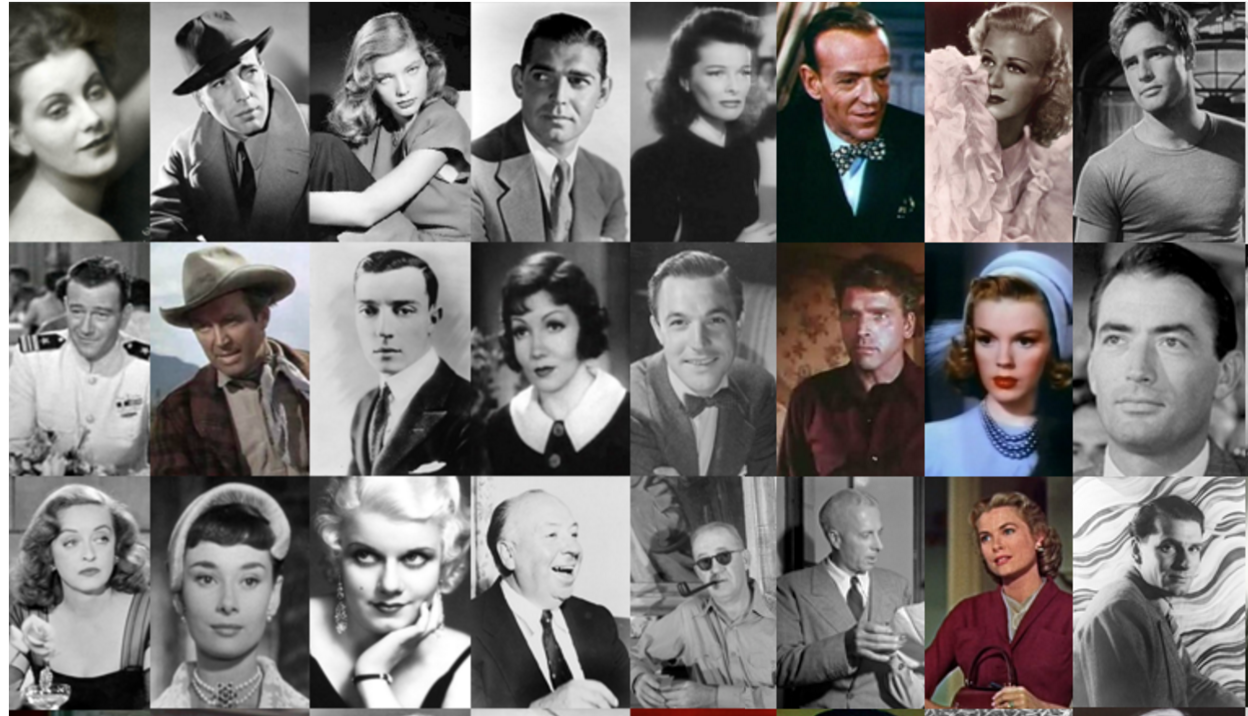


<a id=section101></a> 
### 1.1. Introduction
Movies dataset contains information that are provided from the Movie Database. It collects 1000 movies basic move information and movie matrices, including user Ratings, Votes, Metascore and Revenue data. These metrics can be seen as how successful these movies are. The movie basic information contained like Actor, Director, Runtime, Genres, etc. And the whole dataset duration covers from 2006 to 2016.
    Since it contains plentiful information, the project I investigated is focus on finding properties are associated with successful movies. Besides, the dataset also contains the movie released year, so it also can explore some interesting trends in these movie metrics.

<a id=section102></a> 
### 1.2. Data source and dataset (INSAID)

 https://github.com/insaid2018/Term-1/tree/master/Data/Projects 

<a id=section2></a> 
### 2. Load the packages and data 

In [445]:
# Import packages
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
% matplotlib inline

# Ignore warning related to pandas_profiling
import warnings                                                                
warnings.filterwarnings('ignore') 

#Load teh movies dataset
movies_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")
 

<a id=section3></a> 
### 3. Data Profiling
__Unnderstanding the 1000 Movies Dataset__

<a id=section301></a>

In [401]:
# Display the data type for each variable
movies_data.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [402]:
# This will print the number of rows and comlumns of the Data Frame
movies_data.shape

(1000, 12)

In [403]:
# This will print the names of all columns.
movies_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<a id=section302></a>

In [404]:
# Display the first five rows of the data set
movies_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<a id=section303></a>

In [405]:
# Descriptive statistics for the numerical variables
movies_data.describe() 

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


<a id=section304></a>

In [406]:
#Sample Data
movies_data.sample(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
322,323,RocknRolla,"Action,Crime,Thriller","In London, a real-estate scam puts millions of...",Guy Ritchie,"Gerard Butler, Tom Wilkinson, Idris Elba, Than...",2008,114,7.3,203096,5.69,53.0
285,286,Sucker Punch,"Action,Fantasy",A young girl is institutionalized by her abusi...,Zack Snyder,"Emily Browning, Vanessa Hudgens, Abbie Cornish...",2011,110,6.1,204874,36.38,33.0
101,102,Thor,"Action,Adventure,Fantasy",The powerful but arrogant god Thor is cast out...,Kenneth Branagh,"Chris Hemsworth, Anthony Hopkins, Natalie Port...",2011,115,7.0,570814,181.02,57.0
728,729,The A-Team,"Action,Adventure,Comedy",A group of Iraq War veterans looks to clear th...,Joe Carnahan,"Liam Neeson, Bradley Cooper, Sharlto Copley,Je...",2010,117,6.8,219116,77.21,47.0
294,295,Man of Steel,"Action,Adventure,Fantasy","Clark Kent, one of the last of an extinguished...",Zack Snyder,"Henry Cavill, Amy Adams, Michael Shannon, Dian...",2013,143,7.1,577010,291.02,55.0
164,165,Casino Royale,"Action,Adventure,Thriller","Armed with a licence to kill, Secret Agent Jam...",Martin Campbell,"Daniel Craig, Eva Green, Judi Dench, Jeffrey W...",2006,144,8.0,495106,167.01,80.0
56,57,Don't Breathe,"Crime,Horror,Thriller","Hoping to walk away with a massive fortune, a ...",Fede Alvarez,"Stephen Lang, Jane Levy, Dylan Minnette, Danie...",2016,88,7.2,121103,89.21,71.0
562,563,Sinister,"Horror,Mystery",Washed-up true-crime writer Ellison Oswalt fin...,Scott Derrickson,"Ethan Hawke, Juliet Rylance, James Ransone,Fre...",2012,110,6.8,171169,48.06,53.0
849,850,42,"Biography,Drama,Sport",This movie is about Jackie Robinson and his jo...,Brian Helgeland,"Chadwick Boseman, T.R. Knight, Harrison Ford,N...",2013,128,7.5,69659,95.00,62.0
305,306,Inherent Vice,"Comedy,Crime,Drama","In 1970, drug-fueled Los Angeles private inves...",Paul Thomas Anderson,"Joaquin Phoenix, Josh Brolin, Owen Wilson,Kath...",2014,148,6.7,69509,8.09,81.0


<a id=section305></a>

In [407]:
#Pre Profiling
profile=pandas_profiling.ProfileReport(movies_data)
profile.to_file(outputfile="movies_data_pre_profiling.html")

<a id=section306></a> 
### 3.6. Initial observations:

Metascore has 64 / 6.4% missing values Missing <br/>
Revenue has 128 / 12.8% missing values Missing

In [408]:
# Print Index, Datatype and Memory information
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [409]:
#Check teh missing values
movies_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<a id=section307></a> 
### 3.6. Final observations:

1.  Rename the Runtime and Revenue column name to readable format<br/>
2.  Drop unnecessary columns for answering those questions : Rank, Title, Description<br/>
3.  Replace 0 values columns that with small quantity of nulls : Metascore<br/>
4.  Replace average Revenue values with null values in the Revenue column with group-by Gener.

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a>
### 4.1. Standardize all column headers

In [410]:
## Rename the Runtime and Revenue column name
movies_data.rename(columns={'Runtime (Minutes)':'Runtime'}, inplace=True)
movies_data.rename(columns={'Revenue (Millions)':'Revenue'}, inplace=True)

<a id=section402></a> 
### 4.2. Drop unnecessary columns

In [411]:
#Drop the unnecessary columns
col = ['Rank','Title','Description']
movies_data.drop(col,axis=1,inplace=True)
movies_data.head(1)

,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


<a id=section403></a>
### 4.3. Missing Data and its imputation
Fill 64 Metascore null values with 0

In [412]:
#Fill missing Metascore value with 0
movies_data['Metascore'].fillna(0,inplace=True) 

<a id=section404></a>
### 4.4. Handling NaN data in the categorical columns
 Replace 128 null Revenue values with average values of Revenue column with group-by Gener.


In [413]:
#Fill missing Revenue with averge Revenue based Genre group
movies_data.Revenue = movies_data.groupby('Genre')['Revenue'].apply(lambda x: x.fillna(x.mean()))
movies_data.Revenue = movies_data.Revenue.fillna(movies_data.Revenue.mean())


In [414]:
#Recheck the null values
movies_data.isnull().sum()

Genre        0
Director     0
Actors       0
Year         0
Runtime      0
Rating       0
Votes        0
Revenue      0
Metascore    0
dtype: int64

<a id=section405></a>

In [415]:
#Post Profiling
profile=pandas_profiling.ProfileReport(movies_data)
profile.to_file(outputfile="movies_data_post_profiling.html")

<a id=section5></a>
### 5. Questions

<a id=section501></a>
### 5.1. How Movies Popularity Over Years ?


Text(0.5,1,'Count plot for Movies year wise.')

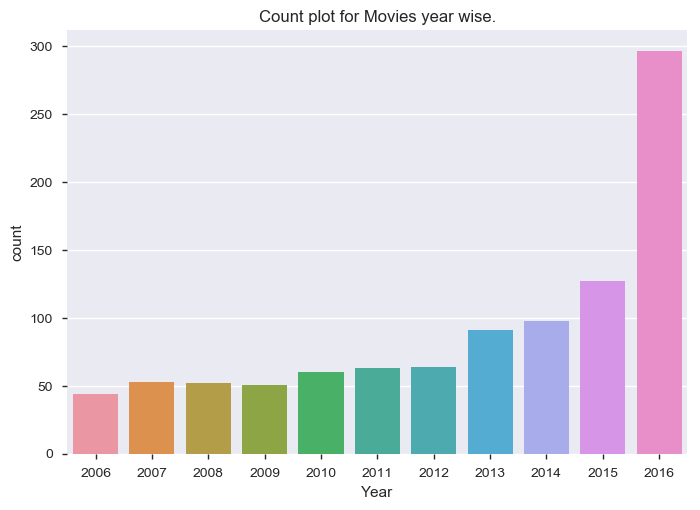

In [417]:
#Plot the graph year wise movies released
sns.countplot(x='Year', data=movies_data).set_title('Count plot for Movies year wise.')
 

From the figure above, we can see that the trend of popularity is upward year to year, and the peak is in the 2016. We still can conclude that popularity over years is going up in recent years.

<a id=section502></a>
### 5.2. How the distribution of Votes in different revenue levels ?

In [418]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [419]:
#choose the years 
dfyear =[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
#creat a empty dataframe,df_q2
df_q2 = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    dfn = df.query('Year == "%s"' % year) # first filter dataframe with the selected year 
    dfn2 = cut_into_quantile(movies_data,'Revenue') #apply the cut_into_quantile with the selected frame, store it to dfn2 
    df_q2 = df_q2.append(dfn2) #append dfn2 to df_q2
df_q2.tail()

,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Revenue_levels
995,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,38.923333,45.0,Medium
996,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0,Medium
997,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0,Moderately High
998,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,58.880000,22.0,Moderately High
999,"Comedy,Family,Fantasy",Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.640000,11.0,Medium


In [435]:
#data into group Low, Medium, Moderately High, High on Revenue levels
dfq2_summary = df_q2.groupby(['Year','Revenue_levels']).median()
dfq2_summary['Rating']=dfq2_summary['Rating']
dfq2_summary.tail(8)


Runtime  Rating     Votes     Revenue  Metascore
Year Revenue_levels                                                   
2015 Low                110.0    6.65   32501.5    2.360000       57.0
     Medium             111.0    6.80   59847.5   32.175000       47.0
     Moderately High    121.0    6.30  135706.0   70.240000       56.0
     High               119.5    7.00  181845.0  178.765000       65.5
2016 Low                106.0    6.70   10708.0    2.870000       64.0
     Medium             102.5    6.15   11567.5   30.910000       47.5
     Moderately High    106.0    6.35   36096.0   69.306538       52.5
     High               108.0    7.15  132378.0  160.480000       60.5

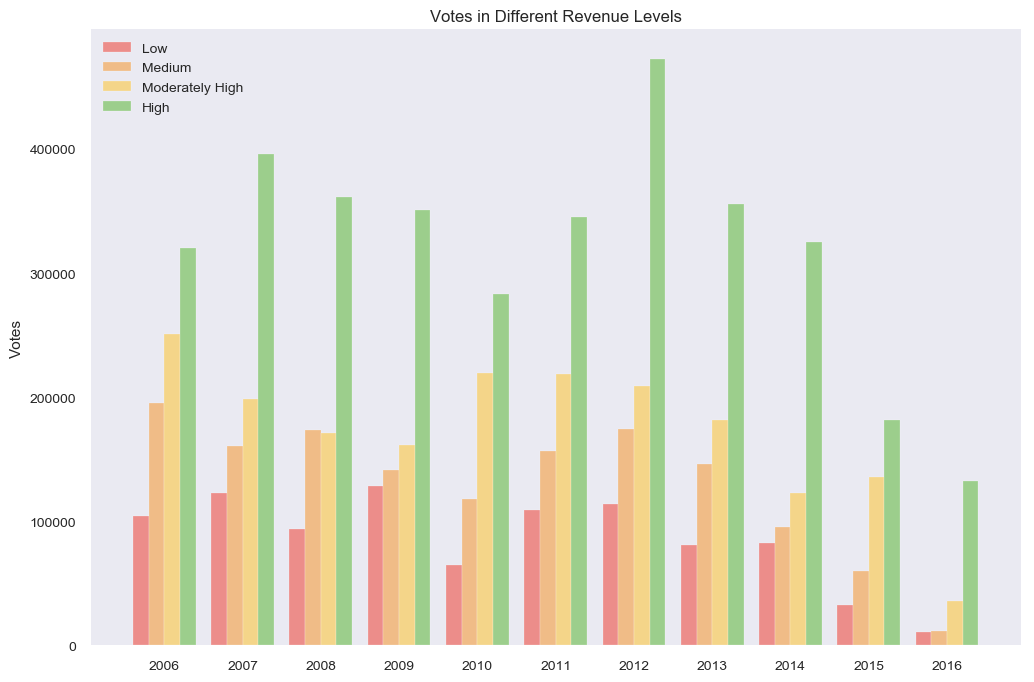

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [444]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('Revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,8))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('Revenue_levels =="Low"')['Votes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('Revenue_levels =="Medium"')['Votes'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('Revenue_levels =="Moderately High"')['Votes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('Revenue_levels =="High"')['Votes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('Votes')

# Set the chart's title
ax.set_title('Votes in Different Revenue Levels')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()

plt.legend

We can see that movies with higher revenue level are with higher Votes .

We can see that revenue level has postive relation with Votes. The result is reasonable since it makes me think of if movie producer wants to make high revenue movies, the first thing they always is to promote it and make it popular. I infer that a high revenue movie is always with a higher Votes than movies with lower revenue levels. So if we define success of a movie is it's revenue, one property it has is the high Votes.

<a id=section503></a>

### 5.3. How the distribution of revenue in different score rating levels ?

In [422]:
# group the dataframe we created above with each revenue levels in each year, find the vote_average mean
dfq2_summary = df_q2.groupby(['Year','Revenue_levels']).mean()
dfq2_summary.tail(4)

Runtime    Rating          Votes     Revenue  \
Year Revenue_levels                                                     
2016 Low              108.704762  6.606667   19164.676190    4.037552   
     Medium           104.220930  6.115116   29298.883721   30.908085   
     Moderately High  107.100000  6.354286   57726.500000   69.078769   
     High             111.555556  6.869444  162747.250000  218.299849   

                      Metascore  
Year Revenue_levels              
2016 Low              59.571429  
     Medium           44.779070  
     Moderately High  51.285714  
     High             53.444444

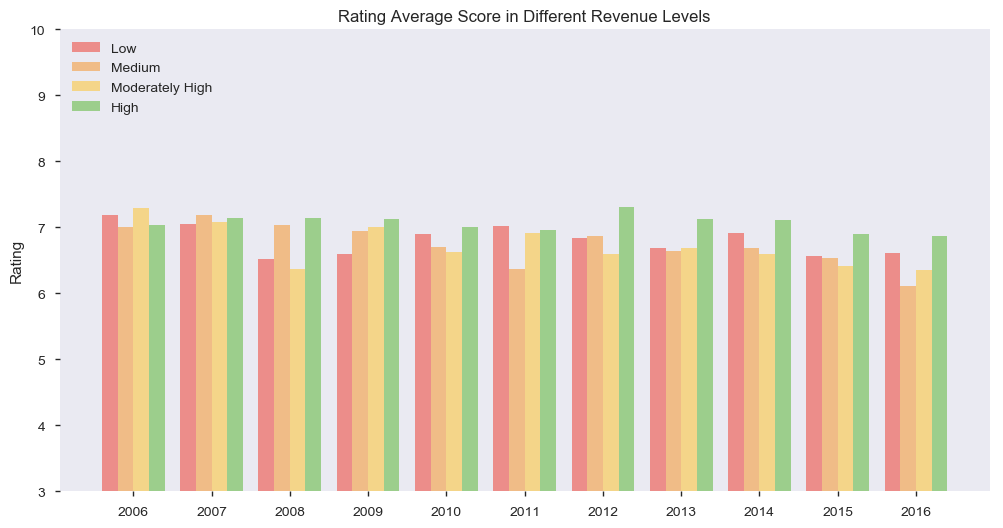

In [423]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('Revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,6))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('Revenue_levels =="Low"')['Rating'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('Revenue_levels =="Medium"')['Rating'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('Revenue_levels =="Moderately High"')['Rating'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('Revenue_levels =="High"')['Rating'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('Rating')

# Set the chart's title
ax.set_title('Rating Average Score in Different Revenue Levels')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016])

#set y-axis height
plt.ylim(3, 10)

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()

From the chart above, we can see that there is no big difference of movie rating between each revenue level. So it can be concluded that the high revenue movies don't have the significant high score rating.

<a id=section504></a>

### 5.4 .Explore Summary

1. Movie popularity trend is growing from 2006 <br/>
2. Movies with higher revenue level are with higher popularity since 2006. In other words, a high revenue movie always with a higher popularity. <br/>
3. Movies with higher revenue level don't have the significant high score rating than other revenue levels. 

<a id=section6></a>
### 6. Analysis through questions
 

<a id=section601><a/>

 
### 6.1. Find the Properties are Associated with Successful Movies :

<a id=section602><a/>

#### 6.1.1.What's the Metascore level movie are associated with movies that have high popularity?

In [446]:
# use cut_into_quantile function to build a level column
df = cut_into_quantile(movies_data,'Metascore')
df.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Metascore_levels
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,High


In [425]:
# Find the mean and median popularity of each level with groupby
result_mean = df.groupby('Metascore_levels')['Votes'].mean()
result_mean 

Metascore_levels
Low                 89007.636719
Medium             149558.466926
Moderately High    191744.533333
High               253308.040486
Name: Votes, dtype: float64

In [439]:
## Find the median popularity of each level with groupby
result_median = df.groupby('Metascore_levels')['Votes'].median()
result_median

Metascore_levels
Low                 65675.0
Medium             108836.0
Moderately High    143316.5
High               192263.0
Name: Votes, dtype: float64

In [427]:
# the x locations for the groups
ind = np.arange(len(result_mean))  
# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

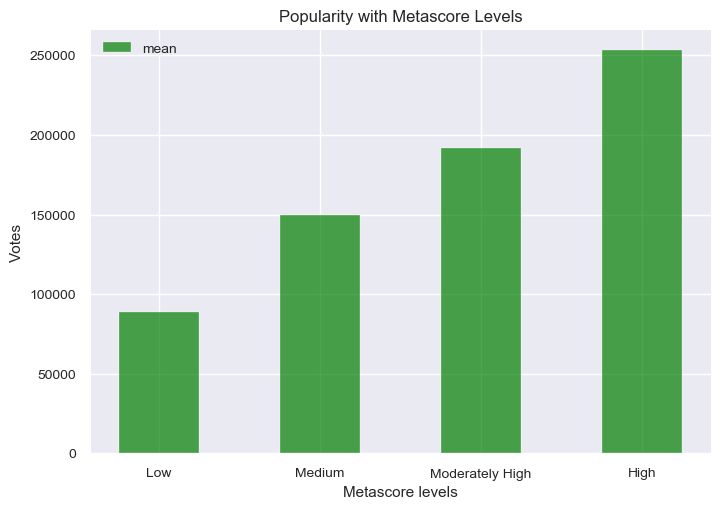

In [428]:
# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(ind, result_mean, width, color='g', alpha=.7, label='mean')

# title and labels
plt.ylabel('Votes')
plt.xlabel('Metascore levels')
plt.title('Popularity with Metascore Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

We can see that the higher popularity movies has Metascore


 <a id=section603><a/>

#### 6.1.2. What's the runtime level are associated with movies that have high popularity on average ?

Divided runtime data into four levels with it's quartile: 'Short', 'Medium', 'Moderately Long', 'Long'.

In [438]:
#use cut_into_quantile function to build a level column
df = cut_into_quantile(movies_data,'Runtime')
df.head(1)

,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Revenue_levels,Metascore_levels,Runtime_levels
0,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,High,High,Moderately High


In [430]:
# Find the mean popularity of each level with groupby
result_mean = df.groupby('Runtime_levels')['Votes'].mean()
result_mean

Runtime_levels
Low                 98387.539855
Medium             131743.542857
Moderately High    177067.158798
High               280973.487805
Name: Votes, dtype: float64

In [431]:
# Find the median popularity of each level with groupby
result_median = df.groupby('Runtime_levels')['Votes'].median()
result_median

Runtime_levels
Low                 54864.5
Medium              92875.0
Moderately High    136323.0
High               232709.0
Name: Votes, dtype: float64

In [432]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars

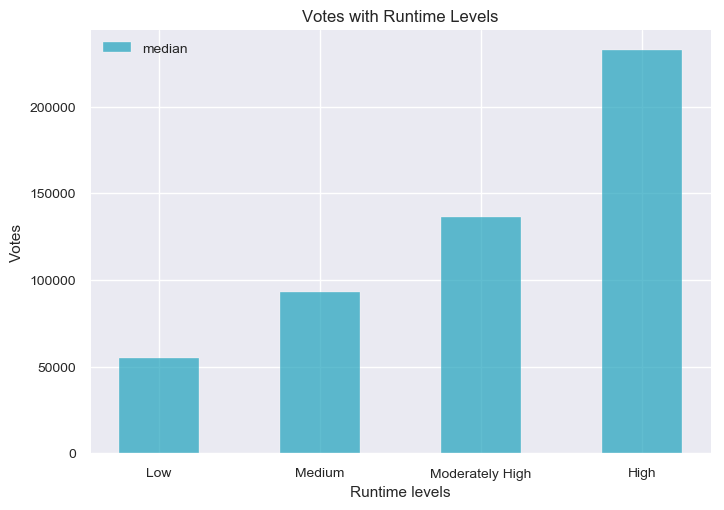

In [433]:
# plot bars
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='median')

# title and labels
plt.ylabel('Votes')
plt.xlabel('Runtime levels')
plt.title('Votes with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend()

We can see that the higher popularity movies has longer run time.

 <a id=section604><a/>

#### 6.1.2. Establish coorelation between all the features using heatmap

Text(0.5,1,'Correlation between features')

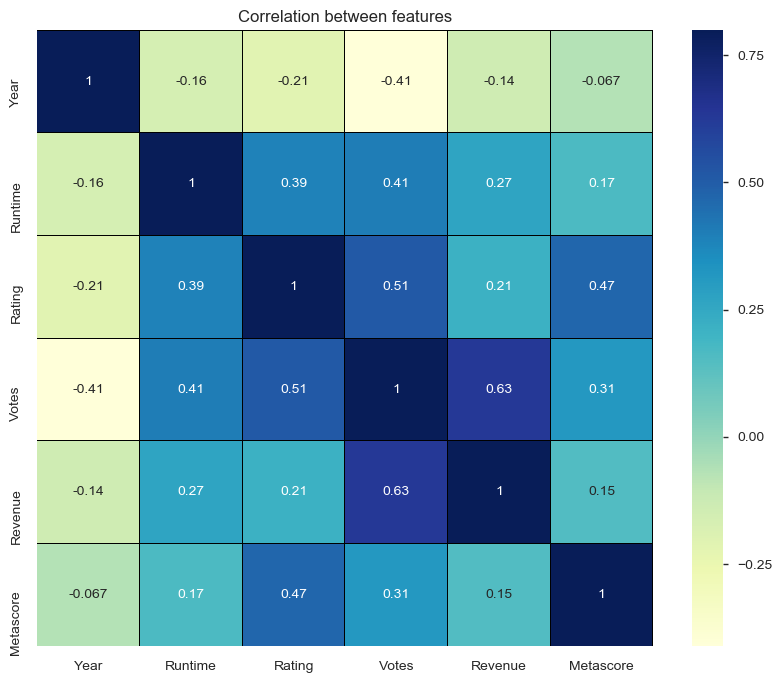

In [442]:
#Plot the graph for Correlation of Features
corr = movies_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

__Observations__
1. Revenue and Votes are positively coorelated with Successfull <br/>
2. Rating and Metascore are positively coorelated with Successfull<br/>
3. Votes and Ratinng are positively coorelated with Successfull<br/>
4. Runtime and Votes are positively coorelated with Successfull

<a id=section7></a> 

### Conclusion

I explored some general questions. The result turned out that the movie popularity trend is growing from 2006 on average. Moreever, I focused on the movies which are with high revenue. I found movies with higher revenue level are with higher popularity on average. Besides, movies with higher revenue level don't have the significant high score rating . And this results made me want to learn more: What's properties that are associated with high popularity movies? What's properties that are associated with high voting score?

The properties that are associated with high popularity movies were with high __Metascore__ (__From: Section 6.1.1__) levels and __Longer Run Time__ (__From: Section 6.1.2__) and high __Voting Score__(__From: Section 5.2__).

To sum up, I did find a lot of interesting information among the dataset, just hope that I can dig more! But there are still some limitations.
 

<a id=section8></a> 

# Limitation:

    1.Data quality: althought I assume the zero values in Metascore column are missing and Replaced average value based on each Gener group, there are still a lot of unreasonable small/big value in the both of the columns. Also, the metrics about rating or popularity are not defined clearly, and the basis of them may be changing year by year.
    
    2.Although the the Votes doesn't have the upperbound , it actually have the high probability of having outliers. But I choose to retain the data to keep the data originalty. Maybe there are still the reason that I should take it into account.
 